<a href="https://colab.research.google.com/github/MonoaraAkter/ML-Lab/blob/main/sleep_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [ ]:
file_path = '/content/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB

First 5

In [ ]:
# Handle missing values (drop for simplicity, though dataset seems clean)
df = df.dropna()

In [ ]:
# Split 'Blood Pressure' into systolic and diastolic columns
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = df['Systolic_BP'].astype(int)
df['Diastolic_BP'] = df['Diastolic_BP'].astype(int)

In [ ]:
# Calculate average sleep duration by occupation
avg_sleep_by_occupation = df.groupby('Occupation')['Sleep Duration'].mean().reset_index().sort_values('Sleep Duration', ascending=False)

In [ ]:
# Average stress level by sleep disorder
avg_stress_by_disorder = df.groupby('Sleep Disorder')['Stress Level'].mean().reset_index().sort_values('Stress Level', ascending=False)

In [ ]:
# Average daily steps by BMI category
avg_steps_by_bmi = df.groupby('BMI Category')['Daily Steps'].mean().reset_index().sort_values('Daily Steps', ascending=False)

In [ ]:
# Print summaries
print("\nAverage Sleep Duration by Occupation:")
print(avg_sleep_by_occupation)
print("\nAverage Stress Level by Sleep Disorder:")
print(avg_stress_by_disorder)
print("\nAverage Daily Steps by BMI Category:")
print(avg_steps_by_bmi)


Average Sleep Duration by Occupation:
             Occupation  Sleep Duration
2              Engineer        7.500000
3                Lawyer        7.340000
1                Doctor        7.214286
4                 Nurse        7.040625
0            Accountant        6.657143
9               Teacher        6.619355
6           Salesperson        6.400000
5  Sales Representative        5.900000
8     Software Engineer        5.900000
7             Scientist        5.800000

Average Stress Level by Sleep Disorder:
  Sleep Disorder  Stress Level
0       Insomnia      5.870130
1    Sleep Apnea      5.666667

Average Daily Steps by BMI Category:
    BMI Category  Daily Steps
0         Normal  7333.333333
3     Overweight  7062.015504
1  Normal Weight  4050.000000
2          Obese  3350.000000


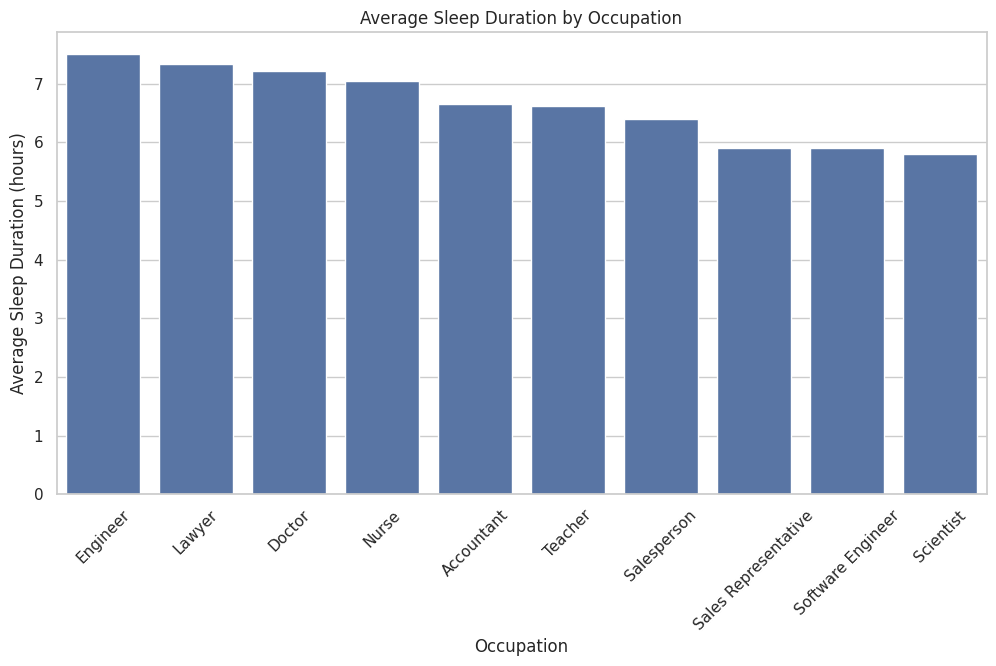

In [ ]:
# Plot 1: Bar plot of Average Sleep Duration by Occupation
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupation', y='Sleep Duration', data=avg_sleep_by_occupation)
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.show()

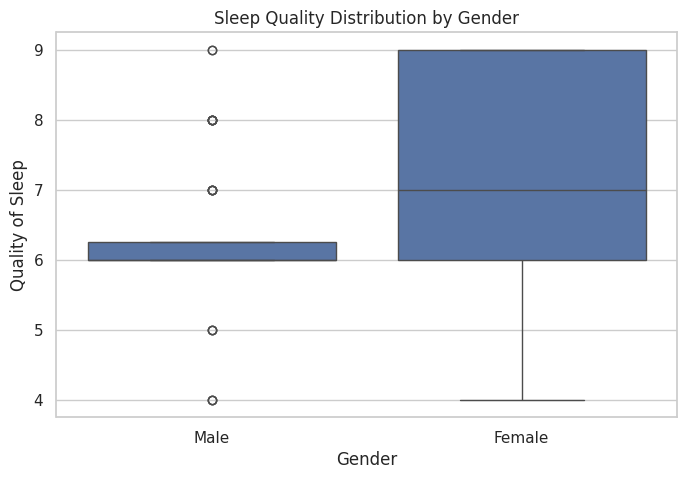

In [ ]:
# Plot 2: Box plot of Sleep Quality by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Quality of Sleep', data=df)
plt.title('Sleep Quality Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep')
plt.show()

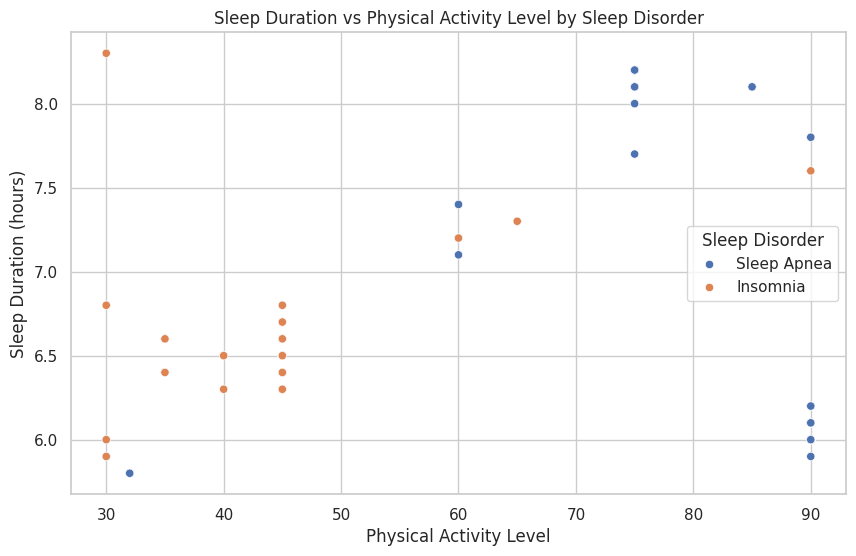

In [ ]:
# Plot 3: Scatter plot of Sleep Duration vs Physical Activity Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Sleep Duration', hue='Sleep Disorder', data=df)
plt.title('Sleep Duration vs Physical Activity Level by Sleep Disorder')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

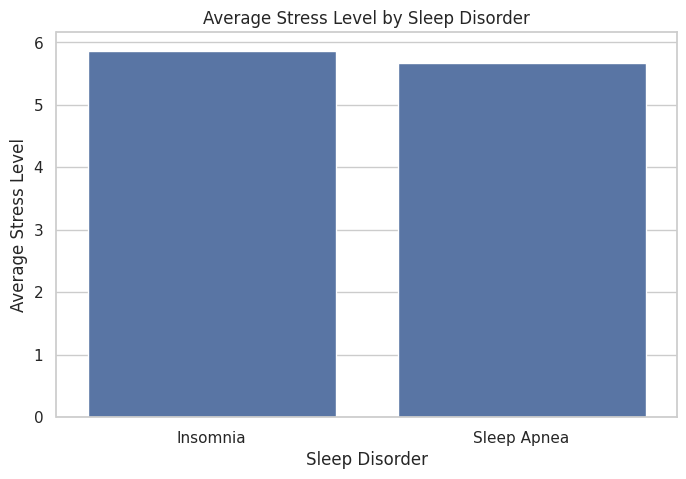

In [ ]:
# Plot 4: Bar plot of Average Stress Level by Sleep Disorder
plt.figure(figsize=(8, 5))
sns.barplot(x='Sleep Disorder', y='Stress Level', data=avg_stress_by_disorder)
plt.title('Average Stress Level by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Stress Level')
plt.show()

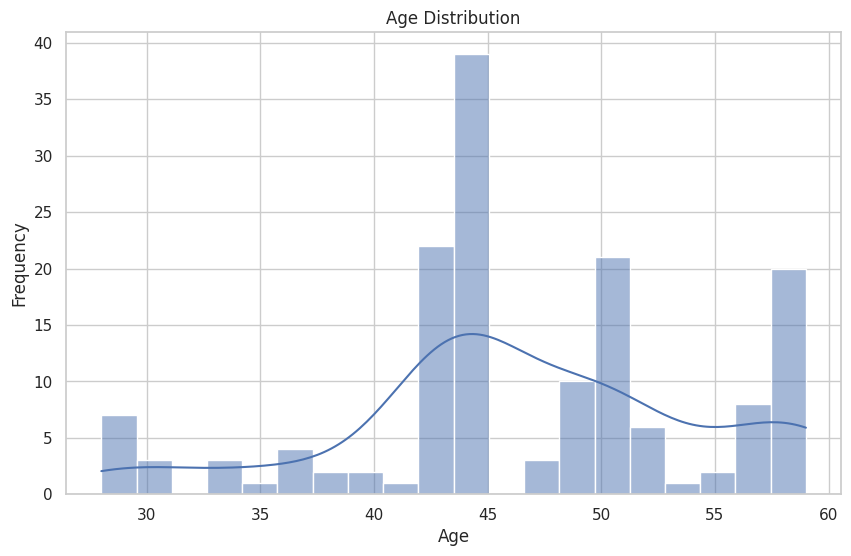

In [ ]:
# Plot 5: Histogram of Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

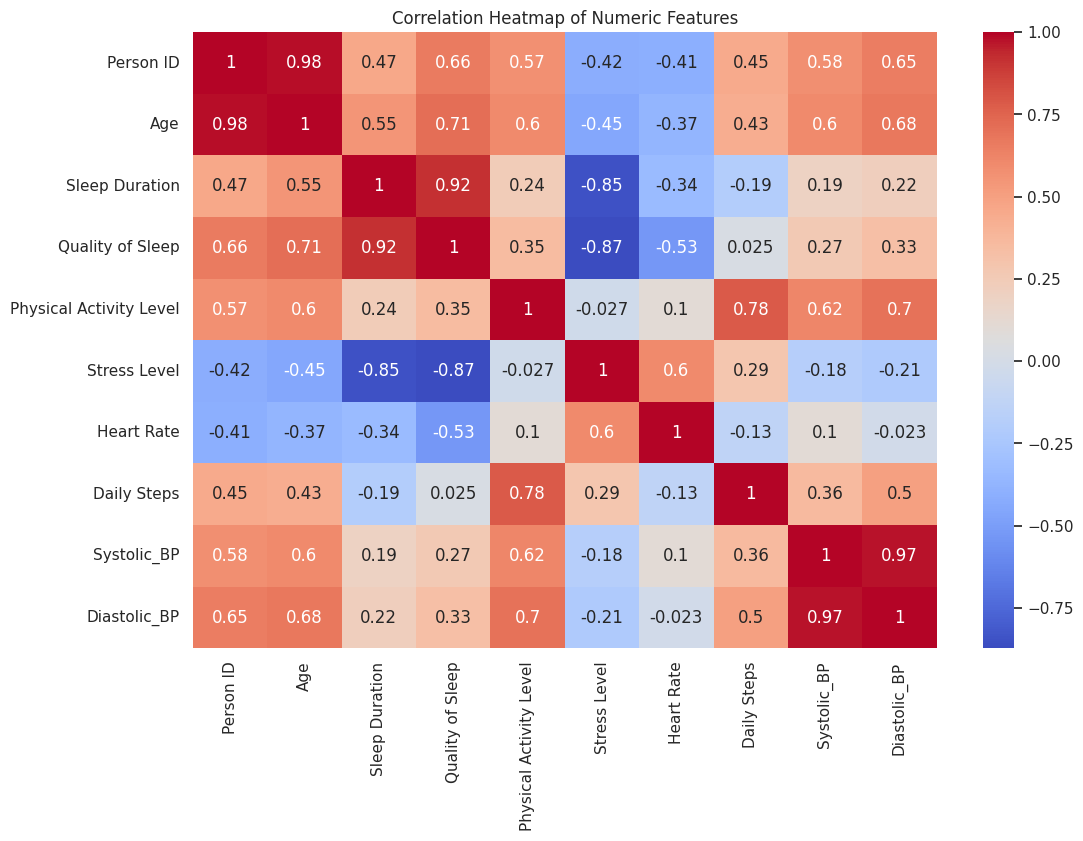

In [ ]:
# Additional: Correlation heatmap (select numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()